In [1]:

#### Libraries
# Standard library
import pickle as cPickle  # Sorry, workaround for Python 3.4
import gzip

# Third-party libraries
import numpy as np

def load_data():
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = cPickle.load(f, encoding='latin1')  # Make it work with Py3.x
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e


In [2]:
%time training_data, validation_data, test_data = load_data_wrapper()

CPU times: user 2.11 s, sys: 870 ms, total: 2.98 s
Wall time: 3.68 s


In [3]:
%time x, y = zip(*training_data)

x = np.array(x)
x = x.reshape(50000, 784)

y = np.array(y)
y = y.reshape(50000, 10)

CPU times: user 73.2 ms, sys: 39 ms, total: 112 ms
Wall time: 136 ms


In [4]:
import keras


import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import PReLU
from keras.utils import np_utils, generic_utils

from sklearn.preprocessing import StandardScaler

np.random.seed(1337) # for reproducibility


def preprocess_data(X, scaler=None):
    if not scaler:
        scaler = StandardScaler()
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler



Using Theano backend.


/Users/tjl/Development/sandpit/lca16/source_packages/Theano/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


In [5]:
nb_classes = y.shape[1]
dims = x.shape[1]

In [18]:
LAYER_ONE_SIZE = 1024

model = Sequential()
model.add(Dense(output_dim=LAYER_ONE_SIZE, input_dim=dims, init='uniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim=nb_classes, input_dim=LAYER_ONE_SIZE, init='uniform'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam")

%time model.fit(x, y, nb_epoch=8, batch_size=128, validation_split=0.15)  

Train on 42500 samples, validate on 7500 samples
Epoch 1/8
42500/42500 [==============================] - 7s - loss: 0.5512 - val_loss: 0.2818
Epoch 2/8
42500/42500 [==============================] - 6s - loss: 0.2212 - val_loss: 0.1924
Epoch 3/8
42500/42500 [==============================] - 8s - loss: 0.1547 - val_loss: 0.1540
Epoch 4/8
42500/42500 [==============================] - 7s - loss: 0.1194 - val_loss: 0.1352
Epoch 5/8
42500/42500 [==============================] - 6s - loss: 0.0955 - val_loss: 0.1194
Epoch 6/8
42500/42500 [==============================] - 7s - loss: 0.0804 - val_loss: 0.1108
Epoch 7/8
42500/42500 [==============================] - 7s - loss: 0.0701 - val_loss: 0.1089
Epoch 8/8
42500/42500 [==============================] - 8s - loss: 0.0606 - val_loss: 0.1014
CPU times: user 1min 29s, sys: 2.5 s, total: 1min 31s
Wall time: 1min


In [19]:
model.layers

In [20]:
firstlayer_weights = model.layers[0].W.eval()

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt
def show_layer(layer):
    weights = layer.W.eval()
    print(weights.shape)
    plt.imshow(weights)

(784, 1024)


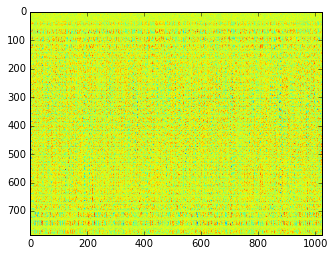

In [22]:
show_layer(model.layers[0])


(1024, 10)


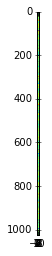

In [23]:
show_layer(model.layers[4])